# Startup Predictor

## Data Import and Cleaning

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_csv('startup data.csv')
df.drop(['zip_code', 'id',  'object_id', 'name', 'Unnamed: 6','Unnamed: 0'], axis=1, inplace=True)
df

,state_code,latitude,longitude,city,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,San Diego,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,Los Gatos,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,San Diego,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,Cupertino,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,San Francisco,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,San Francisco,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,Burlington,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,...,1,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,Sunnyvale,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,...,0,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,San Francisco,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [142]:
#converts the date column to datetime format
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', format='%d/%m/%Y')
    #converts the date column to unix time
    df[col] = df[col].astype(np.int64) // 10**9
    df[col] = df[col].fillna(0)
df[date_cols]

,founded_at,first_funding_at,last_funding_at,closed_at
0,1167609600,1231027200,1262304000,-9223372037
1,946684800,-9223372037,-9223372037,-9223372037
2,-9223372037,-9223372037,-9223372037,-9223372037
3,1009843200,-9223372037,-9223372037,-9223372037
4,1262908800,1262908800,1325635200,1326153600
...,...,...,...,...
918,1230768000,1252281600,1252281600,-9223372037
919,883612800,1104796800,-9223372037,-9223372037
920,915148800,-9223372037,-9223372037,-9223372037
921,1230768000,1241913600,1294704000,-9223372037


In [143]:
visual = df.copy()

In [144]:
df.columns

Index(['state_code', 'latitude', 'longitude', 'city', 'labels', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [145]:
df.dtypes

state_code                   object
latitude                    float64
longitude                   float64
city                         object
labels                        int64
founded_at                    int64
closed_at                     int64
first_funding_at              int64
last_funding_at               int64
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise               

In [146]:
y = df[['status', 'is_top500']]
#we need to predict the status of the startup as a category, so encode it as a category
y['status'] = y['status'].astype('category')
y['status'] = y['status'].cat.codes
y

,status,is_top500
0,0,0
1,0,1
2,0,1
3,0,1
4,1,1
...,...,...
918,0,1
919,1,1
920,1,1
921,0,1


In [147]:
#we will drop the non-numeric columns
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna(axis=1)
df

,latitude,longitude,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,relationships,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,42.358880,-71.056820,1,1167609600,-9223372037,1231027200,1262304000,2.2493,3.0027,3,...,0,1,0,1,0,0,0,0,1.0000,0
1,37.238916,-121.973718,1,946684800,-9223372037,-9223372037,-9223372037,5.1260,9.9973,9,...,0,0,1,0,0,1,1,1,4.7500,1
2,32.901049,-117.192656,1,-9223372037,-9223372037,-9223372037,-9223372037,1.0329,1.0329,5,...,0,0,0,0,1,0,0,0,4.0000,1
3,37.320309,-122.050040,1,1009843200,-9223372037,-9223372037,-9223372037,3.1315,5.3151,5,...,0,0,0,0,0,1,1,1,3.3333,1
4,37.779281,-122.419236,0,1262908800,1326153600,1262908800,1325635200,0.0000,1.6685,2,...,0,0,1,1,0,0,0,0,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,1,1230768000,-9223372037,1252281600,1252281600,0.5178,0.5178,9,...,0,0,0,0,1,0,0,0,6.0000,1
919,42.504817,-71.195611,0,883612800,-9223372037,1104796800,-9223372037,7.2521,9.2274,1,...,0,1,1,0,0,1,0,0,2.6667,1
920,37.408261,-122.015920,0,915148800,-9223372037,-9223372037,-9223372037,8.4959,8.4959,5,...,0,0,0,0,0,0,0,1,8.0000,1
921,37.556732,-122.288378,1,1230768000,-9223372037,1241913600,1294704000,0.7589,2.8329,12,...,0,0,0,0,1,1,0,0,1.0000,1


In [148]:
#train test split
from sklearn.model_selection import train_test_split
X = df.drop(['is_top500', 'closed_at'], axis=1)
#y was defined above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [149]:
#split y into two columns
y_train_status = y_train['status']
y_train_top500 = y_train['is_top500']
y_test_status = y_test['status']
y_test_top500 = y_test['is_top500']

In [150]:
#look at the value counts of the status column and the is_top500 column, to see if there is a class imbalance
print("Before: ")
print(y_train['status'].value_counts(), '\n')
print(y_train['is_top500'].value_counts())

#there is a class imbalance, so we will use SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
import time
sm = SMOTE(random_state=(int(time.time())%4000000000))
X_train_status, y_train_status = sm.fit_resample(X_train, y_train_status)
X_train_top500, y_train_top500 = sm.fit_resample(X_train, y_train_top500)
#look at the value counts of the status column and the is_top500 column, to see if there is a class imbalance
print("After: ")
print(y_train_status.value_counts(), '\n')
print(y_train_top500.value_counts())


Before: 
0    469
1    269
Name: status, dtype: int64 

1    595
0    143
Name: is_top500, dtype: int64
After: 
0    469
1    469
Name: status, dtype: int64 

1    595
0    595
Name: is_top500, dtype: int64


In [151]:
X_train

,latitude,longitude,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,...,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants
311,37.786942,-122.401245,1,1136073600,1167782400,1360195200,1.1616,7.5041,5,4,...,0,0,0,0,0,1,1,1,0,2.0
857,37.761102,-122.416001,0,1168560000,1199750400,1199750400,0.6685,0.6685,7,1,...,0,0,0,0,1,0,0,0,0,3.0
576,40.602206,-75.471279,0,946684800,-9223372037,-9223372037,5.1644,5.1644,0,1,...,0,0,1,0,0,0,0,1,0,4.0
780,37.396914,-121.893905,0,946684800,-9223372037,-9223372037,6.5726,7.1562,1,3,...,0,0,1,1,0,0,1,0,0,3.5
114,32.721834,-117.161797,0,1263081600,-9223372037,1326067200,0.5315,1.9205,12,3,...,0,0,0,1,1,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,40.759089,-73.987573,0,1291248000,1262304000,1262304000,-0.1151,-0.1151,1,1,...,0,0,0,0,1,0,0,0,0,1.0
193,37.775196,-122.419204,1,1104537600,1136246400,-9223372037,1.1616,3.0384,7,2,...,0,0,0,0,0,1,1,0,0,3.5
768,39.783730,-100.445882,1,1230768000,-9223372037,1334016000,0.4000,3.7589,15,4,...,1,0,0,0,0,1,1,1,1,2.5
153,37.554107,-121.975677,1,1104537600,1217635200,1234396800,3.1041,4.9205,10,2,...,0,0,0,0,0,1,1,0,0,2.5


## Training the model

### Part 1: Startup Success Predictor

In [152]:
#random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rfc_status = RandomForestClassifier(n_estimators=1000)
rfc_status.fit(X_train_status, y_train_status)

#predicting the test set results
y_pred = rfc_status.predict(X_test)

#making the confusion matrix, one for status and one for is_top500
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_status, y_pred)

#get the report
from sklearn.metrics import classification_report
print(classification_report(y_test_status, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        57

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [153]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_status, y_pred))
#also calculate the accuracy score on the training set
print(accuracy_score(y_train_status, rfc_status.predict(X_train_status)))

1.0
1.0


<Axes: >

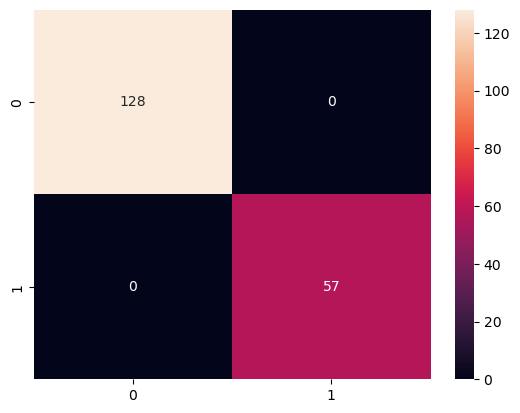

In [154]:
#use seaborn to plot the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')


In [155]:
#accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_status, y_pred))

1.0


### Part 2: Startup T500 Predictor

In [156]:
#train a random forest classifier model on the is_top500 column
rfc_top500 = RandomForestClassifier(n_estimators=1000)
rfc_top500.fit(X_train_top500, y_train_top500)

#predicting the test set results
y_pred = rfc_top500.predict(X_test)

#making the confusion matrix, one for status and one for is_top500
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_top500, y_pred)

#get the report
from sklearn.metrics import classification_report
print(classification_report(y_test_top500, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.73      0.64        33
           1       0.94      0.88      0.91       152

    accuracy                           0.85       185
   macro avg       0.75      0.80      0.77       185
weighted avg       0.87      0.85      0.86       185



In [157]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_top500, y_pred))
#also calculate the accuracy score on the training set
print(accuracy_score(y_train_top500, rfc_top500.predict(X_train_top500)))

0.8540540540540541
1.0


<Axes: >

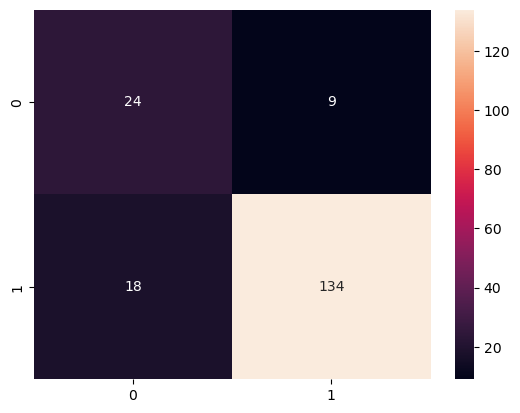

In [158]:
#use seaborn to plot the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

### Feature Importance

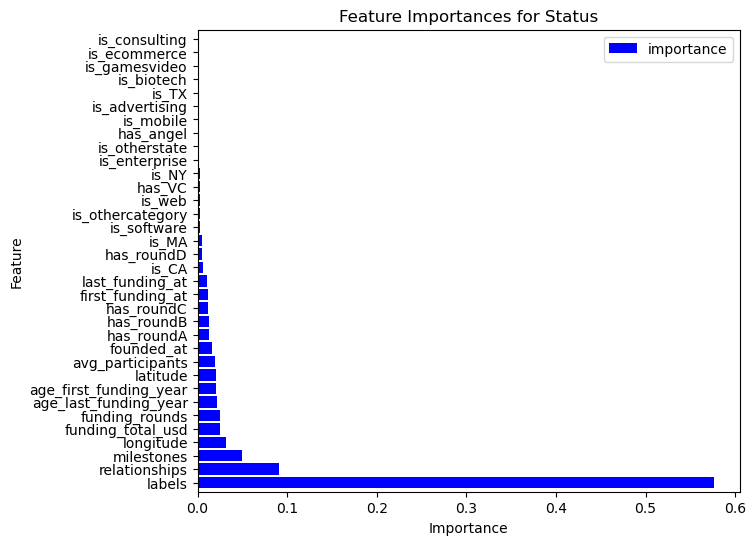

In [159]:
#lets look at the feature importance
feature_importances = pd.DataFrame(rfc_status.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
#plot the feature importances, with the most important features at the top
feature_importances.plot(kind='barh', figsize=(7,6), color='b', zorder=2, width=0.85)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for Status")
plt.show()

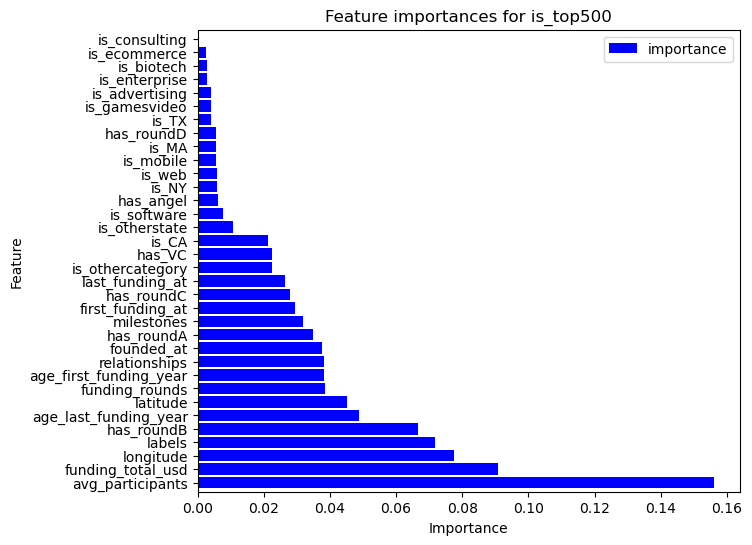

In [160]:
#lets look at the feature importance
feature_importances = pd.DataFrame(rfc_top500.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
#plot the feature importances, with the most important features at the top
feature_importances.plot(kind='barh', figsize=(7,6), color='b', zorder=2, width=0.85)
plt.title('Feature importances for is_top500')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### XGBoost comparison

In [161]:
#use xgboost to train a model
import xgboost as xgb
xgb_status = xgb.XGBClassifier()
xgb_status.fit(X_train_status, y_train_status)
xgb_top500 = xgb.XGBClassifier()
xgb_top500.fit(X_train_top500, y_train_top500)

import pickle

with open('xgb_top500.pkl', 'wb') as file:
    pickle.dump(xgb_top500, file)

with open('xgb_status.pkl', 'wb') as file:
    pickle.dump(xgb_status, file)

#predicting the test set results
y_pred_status = xgb_status.predict(X_test)
y_pred_top500 = xgb_top500.predict(X_test)

#making the confusion matrix, one for status and one for is_top500
cm_status = confusion_matrix(y_test_status, y_pred_status)
cm_top500 = confusion_matrix(y_test_top500, y_pred_top500)

#get the report
print(classification_report(y_test_status, y_pred_status))
print(classification_report(y_test_top500, y_pred_top500))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        57

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

              precision    recall  f1-score   support

           0       0.56      0.70      0.62        33
           1       0.93      0.88      0.91       152

    accuracy                           0.85       185
   macro avg       0.75      0.79      0.76       185
weighted avg       0.86      0.85      0.85       185



In [162]:
#calculate the accuracy
print(accuracy_score(y_test_status, y_pred_status))
#also calculate the accuracy score on the training set
print(accuracy_score(y_train_status, xgb_status.predict(X_train_status)))

print('--------------------------------------')
#calculate the accuracy
print(accuracy_score(y_test_top500, y_pred_top500))
#also calculate the accuracy score on the training set
print(accuracy_score(y_train_top500, xgb_top500.predict(X_train_top500)))

1.0
1.0
--------------------------------------
0.8486486486486486
1.0


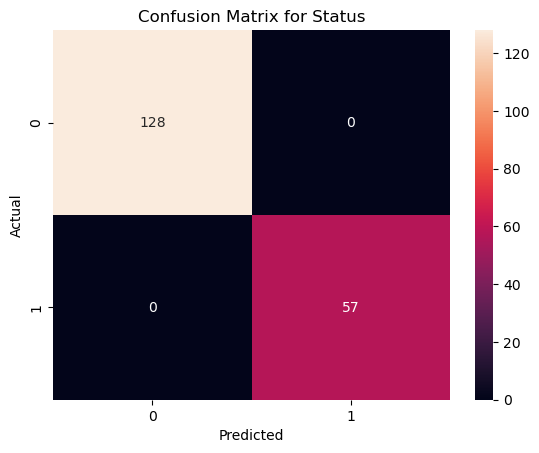

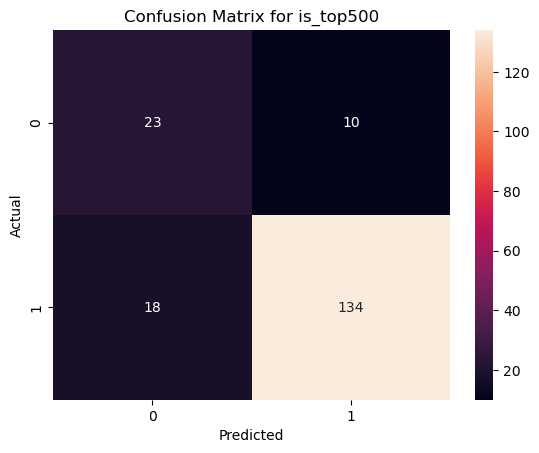

In [163]:
#use seaborn to plot the confusion matrix

sns.heatmap(cm_status, annot=True, fmt='d')
plt.title('Confusion Matrix for Status')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(cm_top500, annot=True, fmt='d')
plt.title('Confusion Matrix for is_top500')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

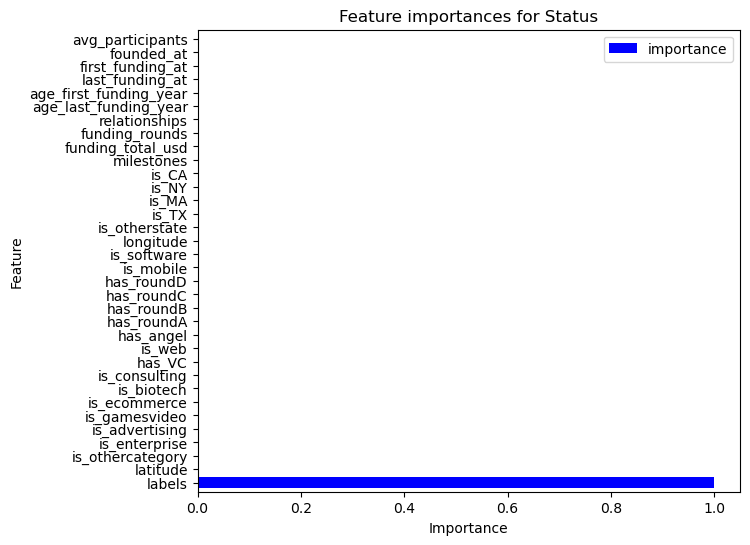

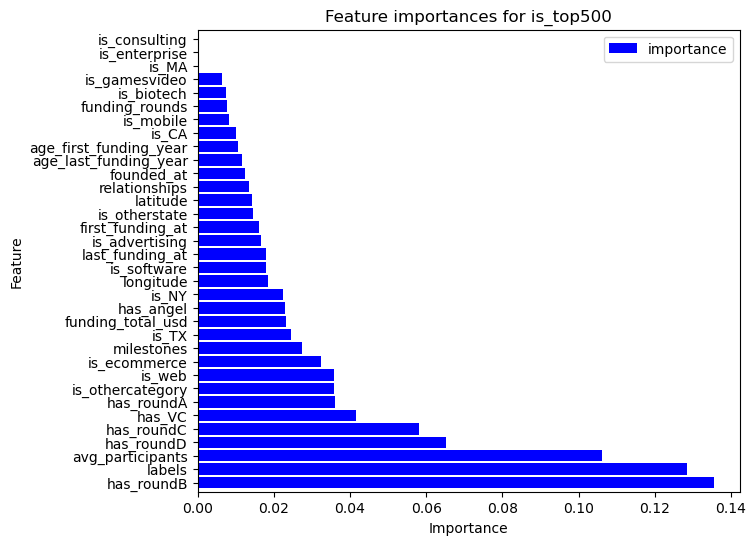

In [164]:
#lets look at the feature importance
feature_importances = pd.DataFrame(xgb_status.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
#plot the feature importances, with the most important features at the top
feature_importances.plot(kind='barh', figsize=(7,6), color='b', zorder=2, width=0.85)
plt.title('Feature importances for Status')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#lets look at the feature importance
feature_importances = pd.DataFrame(xgb_top500.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
#plot the feature importances, with the most important features at the top
feature_importances.plot(kind='barh', figsize=(7,6), color='b', zorder=2, width=0.85)
plt.title('Feature importances for is_top500')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Data Layout and Visualization

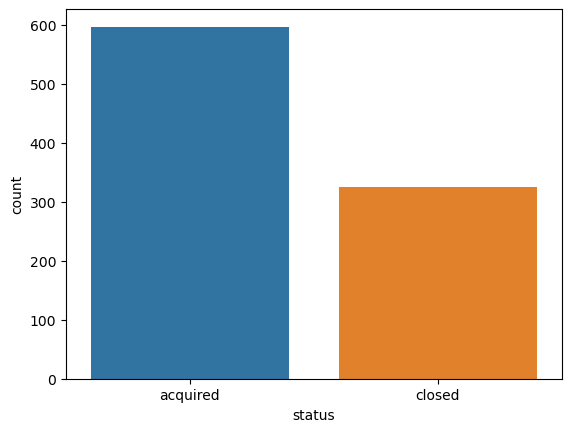

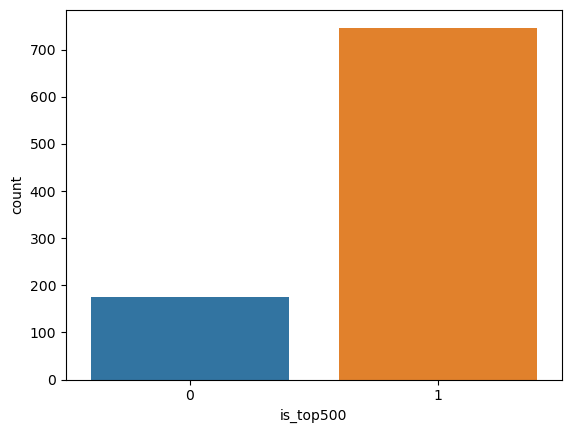

In [165]:
#lets look at the distribution of the status and is_top500
sns.countplot(x='status', data=visual)
plt.show()
sns.countplot(x='is_top500', data=visual)
plt.show()

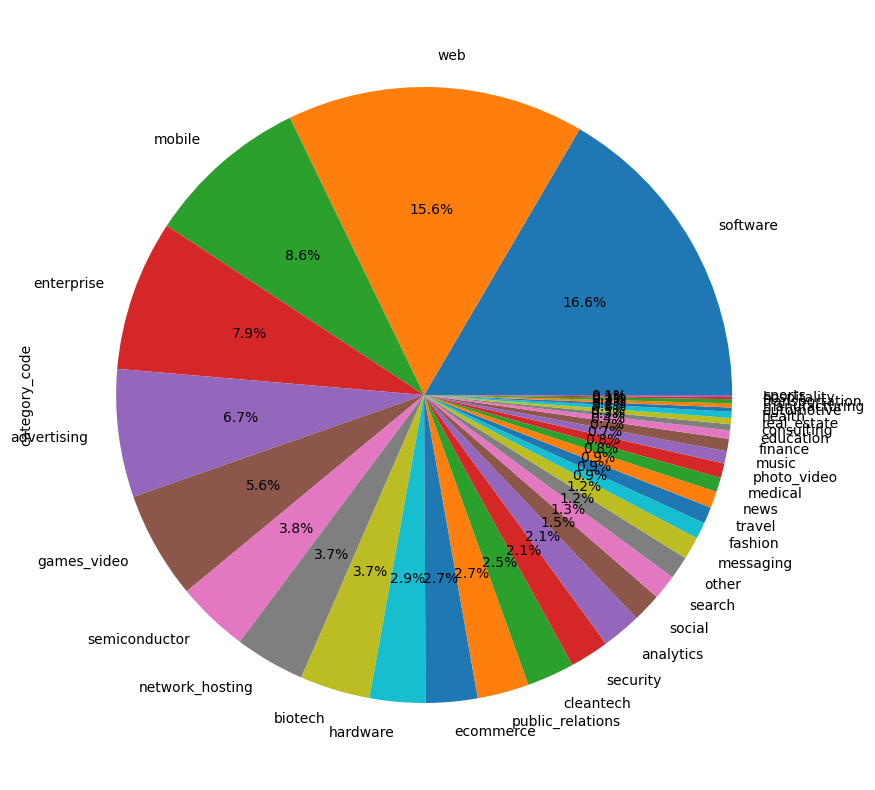

In [166]:
#pie chart for the industry columns
visual['category_code'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.show()

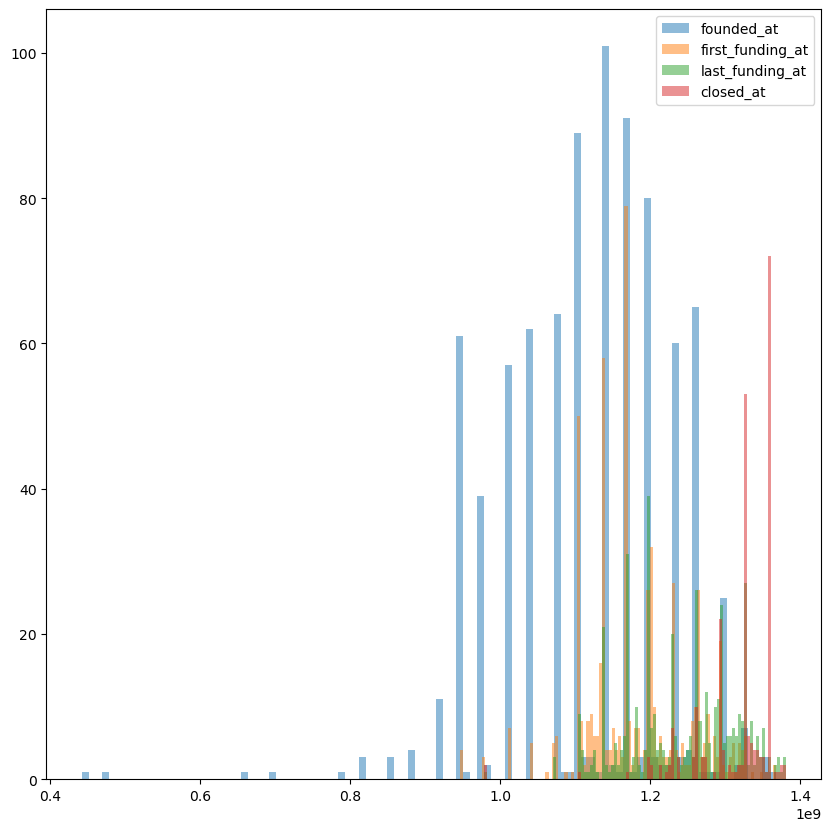

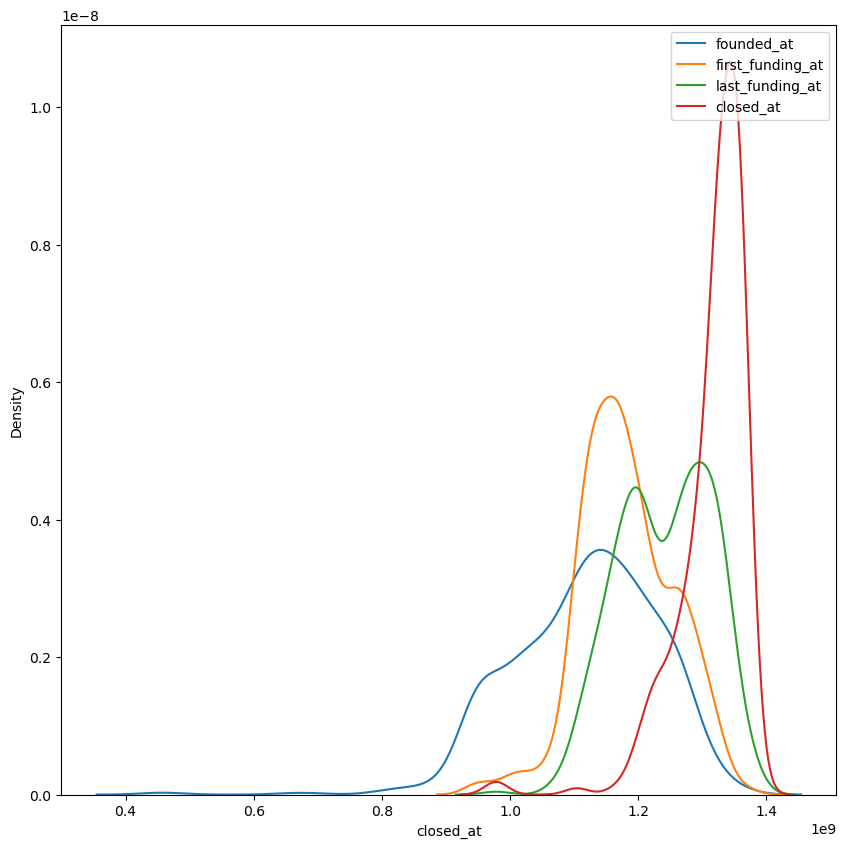

In [167]:
#plot the distribution of the date columns, all on the same plot
plt.figure(figsize=(10,10))
plt.hist(visual[visual['founded_at'] > 0]['founded_at'], bins=100, alpha=0.5, label='founded_at')
plt.hist(visual[visual['first_funding_at'] > 0]['first_funding_at'], bins=100, alpha=0.5, label='first_funding_at')
plt.hist(visual[visual['last_funding_at'] > 0]['last_funding_at'], bins=100, alpha=0.5, label='last_funding_at')
plt.hist(visual[visual['closed_at'] > 0]['closed_at'], bins=100, alpha=0.5, label='closed_at')
plt.legend(loc='upper right')
plt.show()

#also create a density plot for the date columns, all on the same plot
plt.figure(figsize=(10,10))
sns.distplot(visual[visual['founded_at'] > 0]['founded_at'], hist=False, label='founded_at')
sns.distplot(visual[visual['first_funding_at'] > 0]['first_funding_at'], hist=False, label='first_funding_at')
sns.distplot(visual[visual['last_funding_at'] > 0]['last_funding_at'], hist=False, label='last_funding_at')
sns.distplot(visual[visual['closed_at'] > 0]['closed_at'], hist=False, label='closed_at')
plt.legend(loc='upper right')